In [52]:
import numpy as np
import math
import mpmath as mp
from scipy import integrate
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import random
# For Tex in plot labels:
# plt.rcParams['text.usetex'] = True

In [53]:
# Parameters
omegamax=0.083
kmax=0.4
Bo = 2
L=2*(math.pi)/kmax
Ma = -1.5
Bi = 1
nG=50

In [54]:
# Define the domain (0,L)
za = 0;
zb = L;
# find scaling factors from (0, 2 Pi) to (0,L)
cA = (zb - za)/(2*math.pi); cB = za;
# create grid (0, 2 Pi):leszg and on (0,L):lesz
leszg=2*math.pi/nG*np.arange(nG)
lesz = cA*leszg + cB
kg=np.arange(-nG/2, nG/2)
# Defining Fourier D matrices
D1=np.zeros((nG,nG));D2=np.zeros((nG,nG));
for j in range(0,nG):
    for l in range(0,nG):
        if j!=l:
            D1[j,l]=(1/cA)*(1/2)*((-1.)**(j + l))*(1/math.tan((j - l)*math.pi/nG))
for j in range(0,nG):
    for l in range(0,nG):
        if j==l:
            D2[j,l]=((1/cA)**2.)*(-1/12)*(nG-1)*(nG-2)
        else:
            D2[j,l]=((1/cA)**2.)*((1/4)*( (-1.)**(j + l))*nG
                    + ((-1.)**(j+1+l))/(2*math.sin((j-l)*math.pi/nG)**2.))
D3=D2@D1;D4=D2@D2;
# Spectral interpolation
# FT is a matrix that transforms grid values to fourier coefficients
FT=np.zeros((nG,nG))
FT[0,:]=np.cos(leszg*0.0)/2
for k in np.arange(1,nG/2):
    FT[int(k),:]=np.cos(leszg*k)
for k in np.arange(1,nG/2+1):
    FT[int(k+nG/2-1),:]=np.sin(leszg*k)
FT=2/nG*FT
def Fspectrald(data,z):
    fcoeff=FT@data
    zg=(z-cB)/cA
    return (np.sum([np.cos(i*zg)*fcoeff[i+1-1] for \
                    i in np.arange(nG//2)],axis=0)
            +np.sum([np.sin(((i-nG/2)+1)*zg)*fcoeff[i+1-1] for \
                     i in np.arange(nG//2)+nG//2],axis=0))

In [55]:
def odesys(t,h):
    return -D1@((D3@h + Bo*D1@h)*(h**3)/3 + (Ma*Bi/((Bi*h+1)**2))*(D1@(h))*(h**2)/2)

In [56]:
# def jacobian(t,h):
#    return  -(h*(2*Bo*(D1@h)**2)+2*(D1@h)*(D3@h)+h*(Bo*(D2@h)+(D4@h)))*np.eye(nG)\
#            -((h**2)*(2*Bo*(D1@h)+D3@h))*D1\
#            -((1/3.)*Bo*h**3)*D2\
#            -((h**2)*D1@h)*D3\
#            -((1/3.)*h**3)*D4

(0.0, 15.707963267948966)

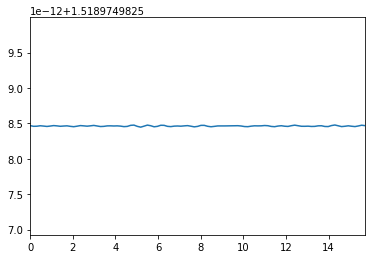

In [57]:
# Initial condition
pert = 0.001;
h0=np.ones(nG)+pert*np.cos(2*math.pi/L*lesz)
# pert = random.random()
xdata=np.arange(0,L+L/100,L/100.);
plt.plot(xdata,Fspectrald(h0,xdata))
plt.xlim(0,L)

In [59]:
T=750/omegamax; #longer time for sliding

In [61]:
%%time
hsol = solve_ivp(odesys,[0.,T],h0,method='LSODA')
# Supplying the jacobian causes solve_ivp to take much smaller time steps 
# and become very slow. Currently, I do not understand why this happens
# hsol = solve_ivp(odesys,[0.,T],h0,method='LSODA',jac=jacobian)

CPU times: user 30.2 ms, sys: 1.07 ms, total: 31.3 ms
Wall time: 34.6 ms


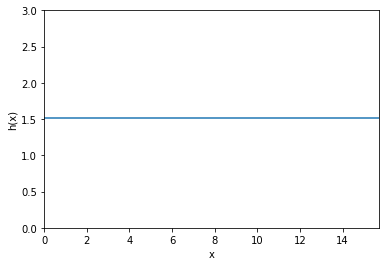

In [62]:
plt.plot(xdata,Fspectrald(hsol.y[:,-1],xdata))
# For Tex:
# plt.xlabel(r'$x$');
# plt.ylabel(r'$h(x)$');
plt.xlabel('x');
plt.ylabel('h(x)');
plt.xlim([0, L]);
plt.ylim([0,3]);
# plt.ylim([0.95,1.05])

In [63]:
movietime=30;fps=5;
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title=f'k=0.5, Bo,Ma,Bi=1', artist='G2',
                comment='RT film; periodic domain')
writer = FFMpegWriter(fps=15, metadata=metadata)

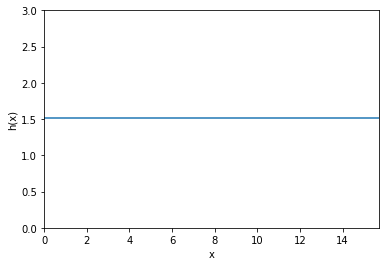

In [64]:
fig = plt.figure();
filmplot, = plt.plot(xdata,Fspectrald(hsol.y[:,0],xdata));
plt.xlabel('x');
plt.ylabel('h(x)');
plt.xlim([0, L]);
plt.ylim([0,3]);
# plt.ylim([0.95,1.05])
with writer.saving(fig, "RT_periodic.mp4", 100):
    for i in range(1,len(hsol.t),math.floor(1+len(hsol.t)/(movietime*fps))):
        filmplot.set_data(xdata,Fspectrald(hsol.y[:,i],xdata))
        writer.grab_frame()

In [67]:
hsol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 525
     njev: 9
      nlu: 9
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.11620305e+00, 1.11633931e+00, 1.11637337e+00,
       1.11640743e+00, 1.11646845e+00, 1.11652946e+00, 1.11659047e+00,
       1.11665080e+00, 1.11671114e+00, 1.11677147e+00, 1.11683218e+00,
       1.11689289e+00, 1.11695361e+00, 1.11701616e+00, 1.11707871e+00,
       1.11714126e+00, 1.11720811e+00, 1.11727496e+00, 1.11734181e+00,
       1.11741514e+00, 1.11748846e+00, 1.11822170e+00, 1.11895494e+00,
       1.11968818e+00, 1.12702058e+00, 1.13435297e+00, 1.20767693e+00,
       1.28100090e+00, 2.01424052e+00, 2.74748015e+00, 1.00798764e+01,
       1.74122727e+01, 9.07362352e+01, 1.64060198e+02, 8.97299823e+02,
       1.63053945e+03, 8.96293570e+03, 9.03614458e+03])
 t_events: None
        y: array([[1.51897498, 1.51895903, 1.51895298, ..., 1.51897498, 1.51897498,
        1.51897498],
     

In [68]:
np.max(hsol.y[:,-1])

1.5189749825586936